In [1]:
import simpy
import numpy as np
import sys
from scipy import interpolate
from IPython.core.debugger import set_trace
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from physiolopy.organ.organ import OrganBase2, OrganInfo, Node
from physiolopy.chemical.chemical import Compartment3, Reaction3, TestTube
from physiolopy.chemical.reaction import Respiration

In [3]:
per = 0.001
species={'D-Glucose':1,
                 'O2':1,
                 'CO2':0,
                 'H2O':0,
                 'ATP':0,
                 'glycogen':0}

tube = TestTube(Compartment3(species, periodo = per))

#C6H12O6 + 6O2 -> 6H2O + 6CO2 + 38ATP https://es.wikipedia.org/wiki/Respiraci%C3%B3n_celular
tube.addReaction('Respiracion',Reaction3(['D-Glucose','O2','H2O','CO2','ATP'],
                [-1,-6,6,6,38],[1,1,0,0,1],kr=1,kl=1, periodo = per))

tube.addReaction('Glucogenólisis',Reaction3(['D-Glucose','glycogen'],
                [-1,1],[1,1],kr=1,kl=1, periodo = per))

In [4]:
env = simpy.Environment()
tube.connect(env)
env.run(until=5)

In [5]:
cp=tube.cp
df = cp.getDataFrame()
df.tail()

,ATP,CO2,D-Glucose,H2O,O2,glycogen,time
4995,0.458253,0.072356,0.493995,0.072356,0.927644,0.493945,4.995
4996,0.458253,0.072356,0.493995,0.072356,0.927644,0.493946,4.996
4997,0.458253,0.072356,0.493995,0.072356,0.927644,0.493946,4.997
4998,0.458253,0.072356,0.493995,0.072356,0.927644,0.493946,4.998
4999,0.458253,0.072356,0.493995,0.072356,0.927644,0.493946,4.999


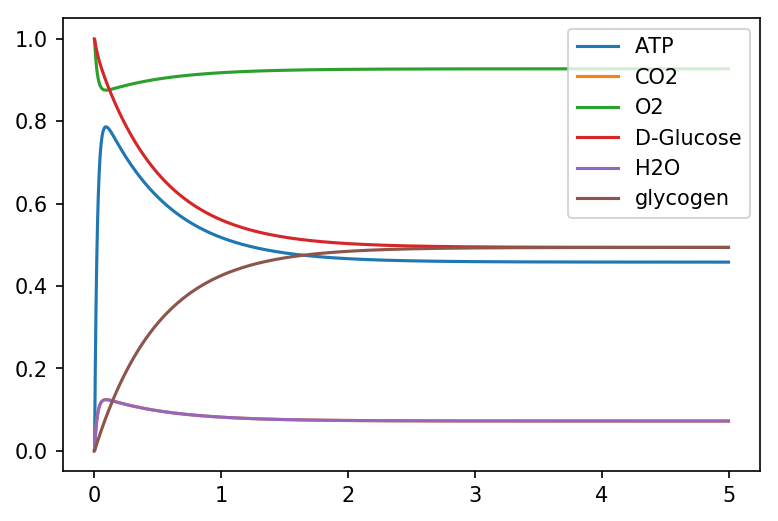

In [6]:
cp.plot()